<a href="https://colab.research.google.com/github/meghana-e/ImageClassification_SmartKnower/blob/main/Logistic_Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.io import imread
from skimage.transform import resize
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.64 s (started: 2021-03-30 14:23:43 +00:00)


In [2]:
target = []
images = []
flatdata = []


time: 2.04 ms (started: 2021-03-30 13:12:13 +00:00)


In [3]:
datadir = '/content/drive/MyDrive/SmartKnower DS/DS images'
categories = ['Cats','Dogs']

for i in categories:
    class_num = categories.index(i) # Label encoding the values
    path = os.path.join(datadir,i) # create a path to use the images. 
    print(path)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path, img))
      #print(img_array.shape)
      img_resize = resize(img_array, (150,150,3))
      flatdata.append(img_resize.flatten())
      images.append(img_resize)
      target.append(class_num)

flatdata = np.array(flatdata)
target = np.array(target)
images = np.array(images)


/content/drive/MyDrive/SmartKnower DS/DS images/Cats
/content/drive/MyDrive/SmartKnower DS/DS images/Dogs
time: 10min 21s (started: 2021-03-30 13:12:13 +00:00)


In [4]:
unique_count = np.unique(target, return_counts= True)
print(unique_count)

(array([0, 1]), array([30, 30]))
time: 4.3 ms (started: 2021-03-30 13:22:35 +00:00)


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(flatdata, target, test_size = 0.2, random_state = 0)

time: 18.7 ms (started: 2021-03-30 14:38:17 +00:00)


In [56]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

time: 45.8 ms (started: 2021-03-30 14:38:18 +00:00)


In [74]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
para = {'random_state' :[50] , 'max_iter' : [15000], 'penalty':['none']},
        
       
model = LogisticRegression(class_weight= 'balanced')
clf = GridSearchCV(model, para)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

time: 2.84 s (started: 2021-03-30 14:51:23 +00:00)


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

time: 4.73 ms (started: 2021-03-30 14:51:07 +00:00)


In [75]:
accuracy_score(y_pred,y_test)*100

66.66666666666666

time: 5.88 ms (started: 2021-03-30 14:51:29 +00:00)


In [39]:
confusion_matrix(y_pred, y_test)

array([[5, 3],
       [2, 2]])

time: 5.44 ms (started: 2021-03-30 14:33:26 +00:00)


In [40]:
#saving model as pickle library. 
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 3.37 ms (started: 2021-03-30 14:33:27 +00:00)


In [41]:
models = pickle.load(open('img_model.p','rb'))

time: 3.21 ms (started: 2021-03-30 14:33:28 +00:00)


Enter an url: https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
(2187, 2187, 3)
Predicted Output: Cats


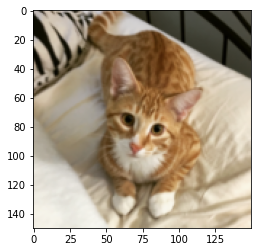

time: 5.32 s (started: 2021-03-30 14:48:47 +00:00)


In [69]:
#Testing a brand new image: 

flat_data = []
url = input("Enter an url: ")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = models.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted Output: {y_out}')